# Will They Seek Treatment for a Mental Illness?

__By Lotus Baumgarner__

### Problem:

I want to build a predictive model to determine if someone would seek treatment for a mental illness or not. This project means a lot to me because I have close friends and family members who deal with mental illness. Some did seek treatment and others are either not seeking it, or I feel would be a lot better off if they sought treatment sooner.
Mental Illness is a real issue in the United States but too many people do not want to talk about it or even admit it. Sometimes they feel it is a weakness or that nobody would understand. Sometimes they just do not know where to start. Some even feel like it is so over dramatized now a days, they do not want to be just part of the hype. 
So, I want to gear this project towards everyday friends and family members who feel someone close to them may be struggling with a mental illness. My motivation for this project is to hopefully deploy a model to help people recognize those who need treatment but will not seek it for themselves. 


### Data Set:
I decided to work with the Mental Health Dataset from Kaggle. 

https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset

The features are all clear and defined and the overall data looks clean. The data is in a CSV format. It consists of just under 300,000 rows and 17 columns. The data types are all objects and are mostly strings or booleans. 
I do have some frequency counts and I am already planning to drop the Timestamps column, keep only the United States cases, and I am most likely going to simply drop the nulls from Self Employed. 


### Column Explanations:
1. __Timestamp__ - Time survey was submitted.
2. __Gender__ - Respondent's Gender.
3. __Country__ - Respondent's Country.
4. __Occupation__ - Respondent's Occupation.
5. __Self Employed__ - Whether the Respondent is self-employed.
6. __Family History__ - Whether there is a family history of mental health issues.
7. __Treatment__ - Whether the Respondent sought treatment for mental health issues.
8. __Days Indoors__ - Number of days Respondent spends inside.
9. __Growing Stress__ - Whether the Respondent is experiencing growing stress.
10. __Changes Habits__ - Whether the Respondent has changed their eating or sleeping habits.
11. __Mental Health History__ - Whether the Respondent has a history of mental health issues.
12. __Mood Swings__ - The frequency of mood swings experienced by the Respondent.
13. __Coping Struggles__ - Whether the Respondent struggles to cope with daily problems/stress.
14. __Work Interest__ - Whether the Respondent has lost interest in work.
15. __Social Interest__ - Whether the Respondent feels socially weak.
16. __Mental Health Interview__ - Willingness to discuss mental health in an interview.
17. __Care Options__ - Respondent's awareness of mental health care options available?

## 1. Data Exploration & Cleaning:

In [1]:
# Basic Data Manipulation
import pandas as pd
import numpy as np

# Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Preprocessing and Models
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier

# Other Imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os  
import pickle  


In [2]:
df = pd.read_csv("C:\\Users\\lotus\\Documents\\Flatiron\\Projects\\Phase5-CapstoneProject\\Data\\Mental Health Dataset.csv")

In [3]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [5]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [6]:
print(df['Timestamp'].value_counts())
print("\n", df['Gender'].value_counts())
print("\n", df['Country'].value_counts())
print("\n", df['Occupation'].value_counts())
print("\n", df['self_employed'].value_counts())
print("\n", df['family_history'].value_counts())
print("\n", df['treatment'].value_counts())
print("\n", df['Days_Indoors'].value_counts())
print("\n", df['Growing_Stress'].value_counts())
print("\n", df['Changes_Habits'].value_counts())
print("\n", df['Mental_Health_History'].value_counts())
print("\n", df['Mood_Swings'].value_counts())
print("\n", df['Coping_Struggles'].value_counts())
print("\n", df['Work_Interest'].value_counts())
print("\n", df['Social_Weakness'].value_counts())
print("\n", df['mental_health_interview'].value_counts())
print("\n", df['care_options'].value_counts())

8/27/2014 11:43    2384
8/27/2014 12:31    2340
8/27/2014 12:53    1648
8/27/2014 16:21    1604
8/27/2014 12:39    1604
                   ... 
8/28/2014 10:22     390
8/29/2014 0:41      390
8/28/2014 16:57     390
9/1/2014 4:28       390
8/28/2014 15:50     390
Name: Timestamp, Length: 580, dtype: int64

 Male      239850
Female     52514
Name: Gender, dtype: int64

 United States             171308
United Kingdom             51404
Canada                     18726
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
South Africa                1994
New Zealand                 1994
Italy                       1560
Israel                      1560
Switzerland                 1560
Poland                       824
Belgium                      824
Greece                       780
S

In [7]:
# Kept only rows associated with the United States.  Makes up a majority of the data set and want to keep focus on US anyway.
treatment_df = df[df['Country'] == 'United States']

In [8]:
# Dropped Timestamp since it doesn't hold any value to my model.
treatment_df = treatment_df.drop('Timestamp', axis=1)

In [9]:
# Dropped the null values from Self Employed. Only 5,202 values are null, so dropping won't lessen data set value.
treatment_df.dropna(subset=['self_employed'], inplace=True)


In [10]:
# Converted columns to 'category' dtype. 
# This makes it easier, since many ML techniques require categorical data to be explicitly declared as such.
categorical_columns = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment',
                       'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
                       'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
                       'mental_health_interview', 'care_options']

for col in categorical_columns:
    treatment_df[col] = treatment_df[col].astype('category')


treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168056 entries, 3 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Gender                   168056 non-null  category
 1   Country                  168056 non-null  category
 2   Occupation               168056 non-null  category
 3   self_employed            168056 non-null  category
 4   family_history           168056 non-null  category
 5   treatment                168056 non-null  category
 6   Days_Indoors             168056 non-null  category
 7   Growing_Stress           168056 non-null  category
 8   Changes_Habits           168056 non-null  category
 9   Mental_Health_History    168056 non-null  category
 10  Mood_Swings              168056 non-null  category
 11  Coping_Struggles         168056 non-null  category
 12  Work_Interest            168056 non-null  category
 13  Social_Weakness          168056 non-null  ca

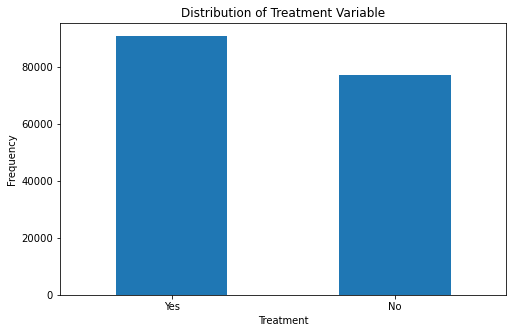

Yes    90950
No     77106
Name: treatment, dtype: int64

In [11]:
# Analyzed the distribution count for the Treatment column to check for imbalance.
treatment_counts = treatment_df['treatment'].value_counts()

plt.figure(figsize=(8, 5))
treatment_counts.plot(kind='bar')

plt.title('Distribution of Treatment Variable')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.show()

treatment_counts

#### Findings:
The distribution of Yes and No values are fairly balanced. So, I'm not going to oversample or undersample for now. 

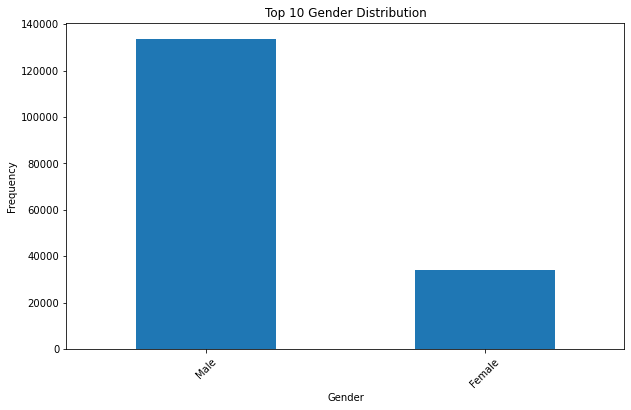

Male      133770
Female     34286
Name: Gender, dtype: int64

In [12]:
# Analyzed the distribution of the 'Gender' column
gender_counts = treatment_df['Gender'].value_counts()

plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar')

plt.title('Top 10 Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()

gender_counts

#### Findings:
The number of Males surveyed severely outweighs the number of females. 

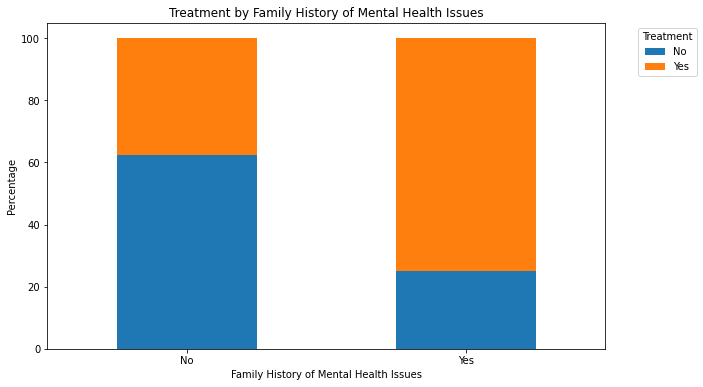

treatment,No,Yes
family_history,,
No,62.278179,37.721821
Yes,25.127403,74.872597


In [13]:
# Analyzed the relationship between Treatment and Family History
treatment_family_history = pd.crosstab(index=treatment_df['family_history'], columns=treatment_df['treatment'], normalize='index') * 100

treatment_family_history.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Treatment by Family History of Mental Health Issues')
plt.xlabel('Family History of Mental Health Issues')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

treatment_family_history

#### Findings:
Those with a family history of mental illness are more likely to seek treatment independently than those without a family history.

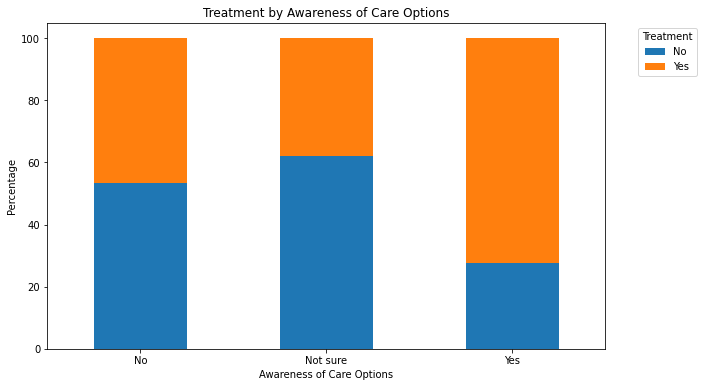

treatment,No,Yes
care_options,,
No,53.403441,46.596559
Not sure,62.184119,37.815881
Yes,27.781177,72.218823


In [14]:
# Analyzing the relationship between Treatment and Care Options
treatment_care_options = pd.crosstab(index=treatment_df['care_options'], columns=treatment_df['treatment'], normalize='index') * 100

# Plotting the relationship
treatment_care_options.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Treatment by Awareness of Care Options')
plt.xlabel('Awareness of Care Options')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

treatment_care_options

#### Findings:
Those who knew about available care options are more likely to seek treatment independently.
Those who were either not sure or did not know of available care options are more likely not to seek treatment on their own.

## 2. Preprocessing and Train-Test Split